In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
sales_data = pd.read_csv('/home/praveen/projects/bigmart/Train.csv',index_col = False)
sales_test_data=pd.read_csv('/home/praveen/projects/bigmart/Test.csv')
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
sales_test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
sales_data[sales_data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [12]:
sales_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
sales_data['Item_Weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

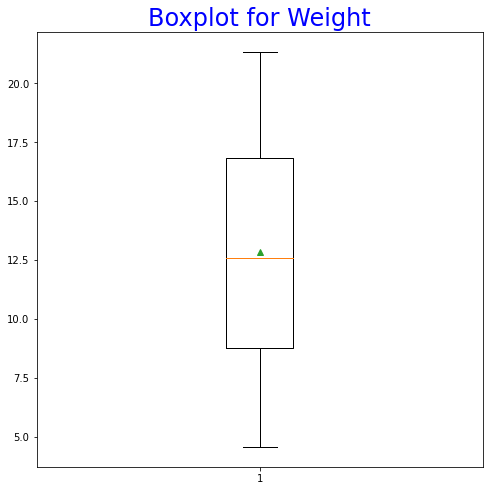

In [18]:
fig=plt.figure(figsize=(8,8))
plt.boxplot(sales_data.dropna(subset=['Item_Weight'])['Item_Weight'],showmeans=True)
plt.title('Boxplot for Weight',fontsize=24,color='blue')
plt.show()

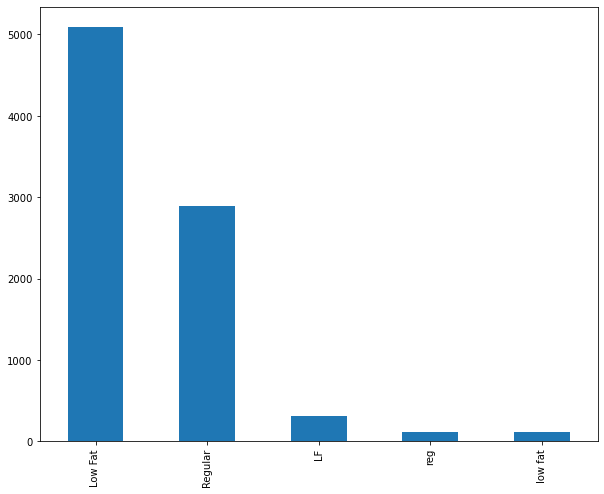

In [19]:
fig=plt.figure(figsize=(10,8))
sales_data['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.show()

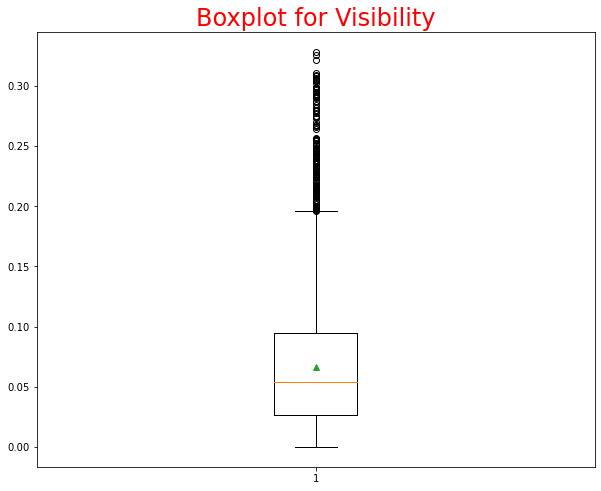

In [20]:
# Distribution of Item Visibility
fig=plt.figure(figsize=(10,8))
plt.boxplot(sales_data['Item_Visibility'],showmeans=True)
plt.title('Boxplot for Visibility',fontsize=24,color='Red')
plt.show()

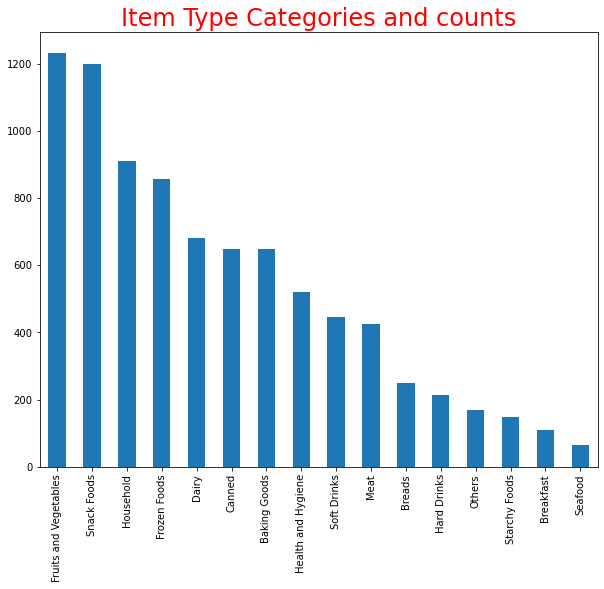

In [21]:
# Item Type
fig=plt.figure(figsize=(10,8))
sales_data['Item_Type'].value_counts().plot(kind='bar')
plt.title('Item Type Categories and counts',fontsize=24,color='Red')
plt.show()

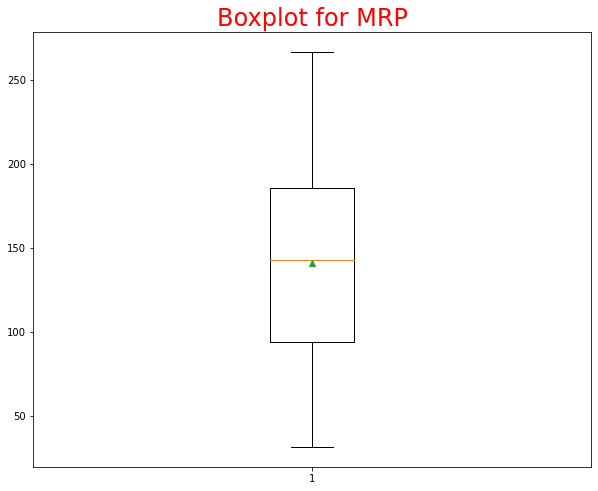

In [22]:
#Item MRP
fig=plt.figure(figsize=(10,8))
plt.boxplot(sales_data['Item_MRP'],showmeans=True)
plt.title('Boxplot for MRP',fontsize=24,color='Red')
plt.show()

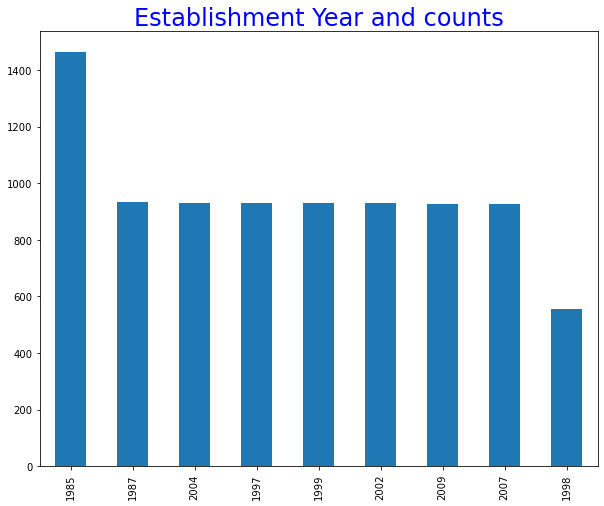

In [27]:
# No outliers fairly normal distribution
# Outlet Identifier is just a Unique Value
# Outlet Establishment is just a Unique Value


fig=plt.figure(figsize=(10,8))
sales_data['Outlet_Establishment_Year'].value_counts().plot(kind='bar')

plt.title('Establishment Year and counts',fontsize=24,color='blue')
plt.show()

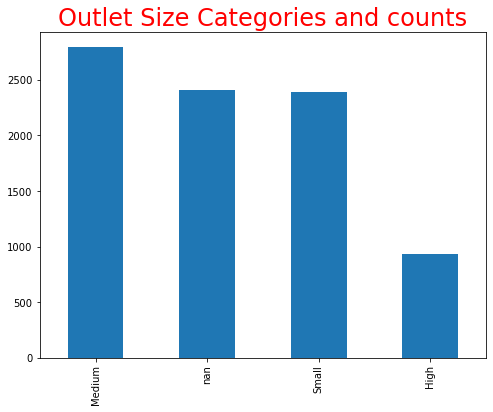

In [28]:
#Outler Size value Counts

fig=plt.figure(figsize=(8,6))
sales_data['Outlet_Size'].value_counts(dropna=False).plot(kind='bar')
plt.title('Outlet Size Categories and counts',fontsize=24,color='Red')
plt.show()

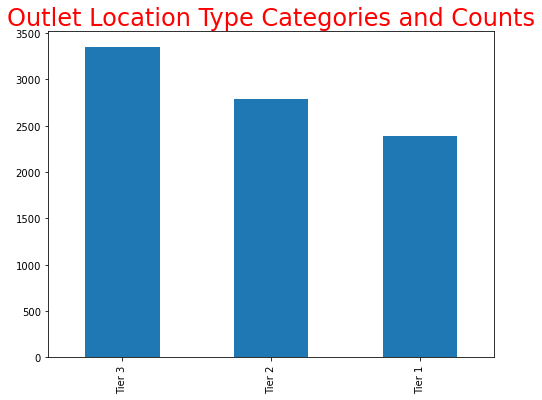

In [29]:
fig=plt.figure(figsize=(8,6))
sales_data['Outlet_Location_Type'].value_counts(dropna=False).plot(kind='bar')
plt.title('Outlet Location Type Categories and Counts',fontsize=24,color='Red')
plt.show()

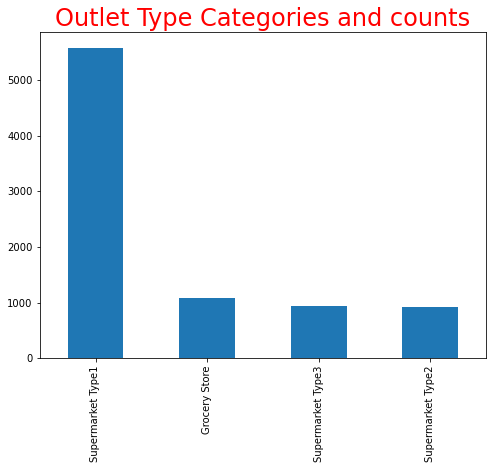

In [31]:
# Outlet Type value Counts

fig=plt.figure(figsize=(8,6))
sales_data['Outlet_Type'].value_counts(dropna=False).plot(kind='bar')
plt.title("Outlet Type Categories and counts", fontsize=24,color='Red')
plt.show()

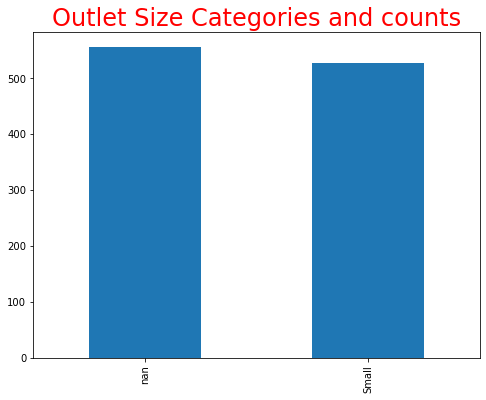

In [32]:
sales_data.dropna().pivot_table(index=['Outlet_Type','Outlet_Location_Type'],columns='Outlet_Size',values='Outlet_Identifier',aggfunc='count')

# Outlet Size value Counts
# If its a grocery store then small size

fig=plt.figure(figsize=(8,6))
sales_data[sales_data['Outlet_Type']=='Grocery Store']['Outlet_Size'].value_counts(dropna=False).plot(kind='bar')
plt.title('Outlet Size Categories and counts',fontsize=24,color='Red')
plt.show()

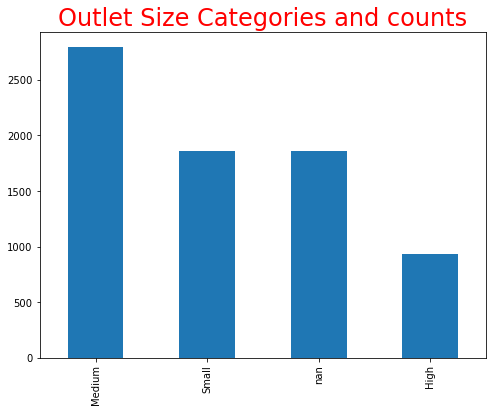

In [33]:
# Outlet Size value Counts
#If its not a grocery store

fig = plt.figure(figsize=(8,6))
sales_data[sales_data['Outlet_Type']!='Grocery Store']['Outlet_Size'].value_counts(dropna=False).plot(kind='bar')
plt.title('Outlet Size Categories and counts',fontsize=24, color='Red')
plt.show() 

In [34]:
sales_data.head()

# Item Identifier and Outlet Identifier are Unique Identifiers which we don't need for machine learning model


sales_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [35]:
fat_dict = {
        'Low Fat' : 'Low Fat',
         'Regular': 'Regular',
          'low fat': 'Low Fat',
          'LF' : 'Low Fat',
         'reg' : 'Regular'
}

In [36]:
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].map(fat_dict)

In [37]:
sales_test_data['Item_Fat_Content'] = sales_test_data['Item_Fat_Content'].map(fat_dict)

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Item_Type'>

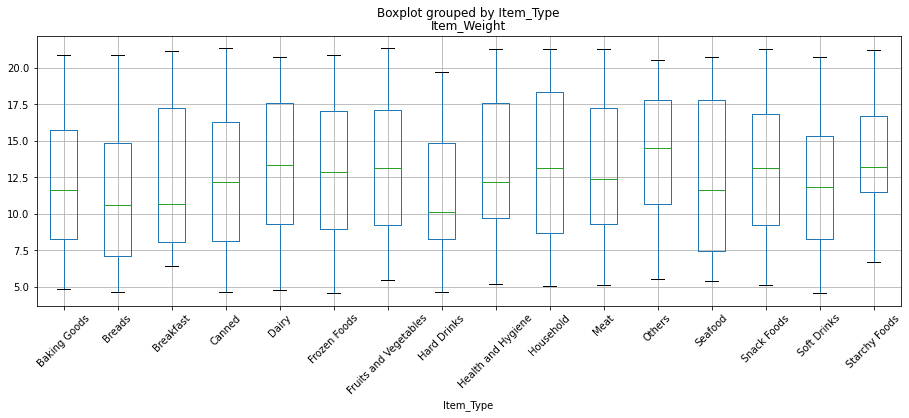

In [38]:
sales_data.boxplot(column='Item_Weight', by= 'Item_Type', figsize=(15,5), rot=45)

In [39]:
sales_data['Item_Weight'].fillna(sales_data['Item_Weight']. mean(), inplace=True)

In [40]:
sales_test_data['Item_Weight'].fillna(sales_test_data['Item_Weight']. mean(), inplace=True)

In [41]:
sales_data['Item_Weight'].isnull().sum()

0

In [42]:
sales_test_data['Item_Weight'].isnull().sum()

0

In [43]:
sales_data['Outlet_Size'].fillna('Unknown', inplace=True)

In [44]:
sales_test_data['Outlet_Size'].fillna('Unknown', inplace=True)

<AxesSubplot:>

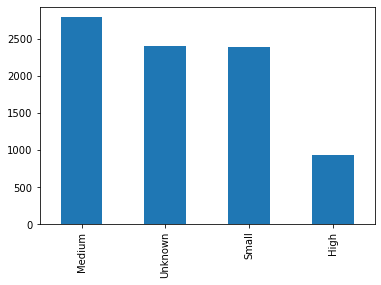

In [45]:
sales_data['Outlet_Size'].value_counts().plot(kind='bar')


<AxesSubplot:>

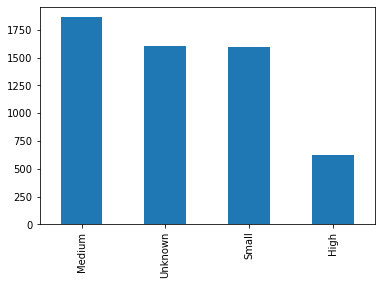

In [46]:
sales_test_data['Outlet_Size'].value_counts().plot(kind='bar')

In [47]:
sales_data.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [48]:
sales_test_data.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)


In [49]:
sales_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Unknown,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
sales_test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Unknown,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Unknown,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Unknown,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [51]:
sales_modified = pd.get_dummies(sales_data, drop_first=True)

In [52]:
sales_test_data_modified = pd.get_dummies(sales_test_data, drop_first=True)

In [53]:
print(sales_data.shape)
print(sales_modified.shape)

(8523, 10)
(8523, 29)


In [54]:
print(sales_test_data.shape)
print(sales_test_data_modified.shape)


(5681, 9)
(5681, 28)


In [55]:
sales_modified.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [58]:
sales_modified.to_csv('/home/praveen/projects/bigmart/modified_train.csv', index=False)

In [59]:
sales_test_data_modified.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,12.695633,0.118599,234.2300,1985,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [60]:
sales_modified.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Size_Unknown',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [61]:
sales_test_data_modified.to_csv('/home/praveen/projects/bigmart/modified_test.csv', index=False)

In [62]:
sales_test_data_modified.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Size_Unknown',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [63]:
## ML Modeling 
# 1. We split the data in to X and y where X = Features and y = target variable
# 2. We create train and test set
# 3. Experiment with multiple algorithms and capture results

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [64]:
sales_modified.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [65]:
# Create X & Y and train and test dataset

X = sales_modified.drop('Item_Outlet_Sales', axis=1)
y = sales_modified['Item_Outlet_Sales']


In [66]:
X_train,X_Val, y_train, y_Val = train_test_split(X,y, train_size = 0.8, random_state=10)

print(X_train.shape)
print(X_Val.shape)


(6818, 28)
(1705, 28)


In [67]:
# Instantiate all the models

lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [68]:
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(X_Val)

In [70]:
np.sqrt(mean_squared_error(y_Val, y_pred))

1123.7684741357139

In [71]:
# Create a list of model and name representation for running experiments

model_ls = [(lr, 'Linear Regression'),(ls, 'Lasso'),(rd, 'Ridge'),(dr, 'Decission Tree Reg'), (rr, 'Random Forest Reg')]

# Iterate over each model

for item in model_ls:
    model = item[0]
    name = item[1]
    print(f'Running {name}')
    print('')


# Train the model

    model.fit(X_train, y_train)

# predict the results

    y_pred = model.predict(X_Val)

# calculate the root mean squared error

    error = round(np.sqrt(mean_squared_error(y_Val, y_pred)),2)

# print the value

    print (f'Root mean squared error using {name}is {error}')
    print ('-'*100)
    print('')

Running Linear Regression

Root mean squared error using Linear Regressionis 1123.77
----------------------------------------------------------------------------------------------------

Running Lasso

Root mean squared error using Lassois 1121.98
----------------------------------------------------------------------------------------------------

Running Ridge

Root mean squared error using Ridgeis 1123.66
----------------------------------------------------------------------------------------------------

Running Decission Tree Reg

Root mean squared error using Decission Tree Regis 1575.68
----------------------------------------------------------------------------------------------------

Running Random Forest Reg

Root mean squared error using Random Forest Regis 1132.82
----------------------------------------------------------------------------------------------------



In [73]:
# Create X & Y and train and test dataset

X = sales_modified.drop('Item_Outlet_Sales', axis=1)
y = sales_modified['Item_Outlet_Sales']
#X_test= sales_test_data
X_test=sales_test_data_modified


In [74]:
# Instantiate all the models

lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [75]:
lr.fit(X_train,y_train)

LinearRegression()

In [76]:
sales_test_data_modified.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,12.695633,0.118599,234.2300,1985,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [77]:
y_pred = lr.predict(X_test)

In [78]:
y_pred = pd.DataFrame(y_pred)

In [79]:
y_pred.shape

(5681, 1)

In [80]:
y_pred.rename(columns={0:'Item_Outlet_Sales_test'},inplace =True)

In [81]:
y_pred

,Item_Outlet_Sales_test
0,1808.294202
1,1491.312007
2,1831.436717
3,2557.846361
4,5085.939113
...,...
5676,2292.899177
5677,2545.578566
5678,1842.379058
5679,3584.786225


In [82]:
y_pred.to_csv('predicted_Item_Outlet_Sales_test.csv', index=False)